# Prediksi Jumlah Hotspot di Kalimantan Menggunakan Model Long Short-Term Memory Berdasarkan Indikator Iklim

In [4]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# data preprocessing
from sklearn.model_selection import train_test_split

# modeling
import tensorflow as tf

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

## Data Cleaning

In [2]:
# import data
data = pd.read_excel("Data 4.xlsx", sheet_name = "Sheet1")
data.head(24)

,Tanggal,Rataan Curah Hujan,Rataan Anomali,Rataan Hari Tanpa Hujan,ENSO index,IOD Index,season,Jumlah Titik Api
0,2001-01-01,9.772962,1.436225,22.549187,-0.88,-0.366,1,0
1,2001-02-01,9.076214,1.366191,29.098797,-0.63,0.063,2,6
2,2001-03-01,8.389973,1.070630,30.089170,-0.48,0.090,3,7
3,2001-04-01,8.991081,-0.292051,30.694803,-0.30,0.212,4,1
4,2001-05-01,7.088331,2.908007,36.506059,-0.30,0.217,5,28
5,2001-06-01,4.548424,1.991337,43.784318,-0.11,0.241,6,0
6,2001-07-01,4.571820,0.595294,55.468820,0.01,-0.043,7,134
7,2001-08-01,3.322079,3.350797,62.911041,-0.07,-0.189,8,947
8,2001-09-01,5.601590,-2.952955,55.342908,-0.28,-0.117,9,295
9,2001-10-01,8.903423,-0.495941,46.696653,-0.26,-0.291,10,6


In [3]:
# check data shape
data.shape

(240, 8)

In [4]:
# check the duplicates from data
data.duplicated().sum()

0

In [5]:
# check the null from the data
data.isnull().sum()

Tanggal                    0
Rataan Curah Hujan         0
Rataan Anomali             0
Rataan Hari Tanpa Hujan    0
ENSO index                 0
IOD Index                  0
season                     0
Jumlah Titik Api           0
dtype: int64

In [6]:
# describe the data
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Tanggal,240,2010-12-16 05:00:00,2001-01-01 00:00:00,2005-12-24 06:00:00,2010-12-16 12:00:00,2015-12-08 18:00:00,2020-12-01 00:00:00,NaN
Rataan Curah Hujan,240.0,8.507756,2.163793,6.398748,8.841564,10.46922,15.016418,2.813907
Rataan Anomali,240.0,-0.066458,-6.265761,-1.449518,-0.107777,1.566086,4.419493,2.116896
Rataan Hari Tanpa Hujan,240.0,39.153984,20.365427,30.425254,35.039618,46.722991,71.919032,11.820816
ENSO index,240.0,0.040542,-1.79,-0.4425,-0.01,0.51,2.57,0.793746
IOD Index,240.0,0.129938,-0.661,-0.06225,0.1175,0.31375,1.123,0.290972
season,240.0,6.5,1.0,3.75,6.5,9.25,12.0,3.459267
Jumlah Titik Api,240.0,601.133333,0.0,9.0,33.5,279.5,9398.0,1535.077085


In [7]:
# check the information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tanggal                  240 non-null    datetime64[ns]
 1   Rataan Curah Hujan       240 non-null    float64       
 2   Rataan Anomali           240 non-null    float64       
 3   Rataan Hari Tanpa Hujan  240 non-null    float64       
 4   ENSO index               240 non-null    float64       
 5   IOD Index                240 non-null    float64       
 6   season                   240 non-null    int64         
 7   Jumlah Titik Api         240 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 15.1 KB


In [8]:
# sort the data by 'Tanggal'
data = data.sort_values(by = "Tanggal")

# set 'Tanggal' as index
data = data.groupby("Tanggal").sum()

# drop 'season'
data.drop(columns = "season", inplace = True)

## Exploratory Data Analysis

### Hotspot Trend in Kalimantan

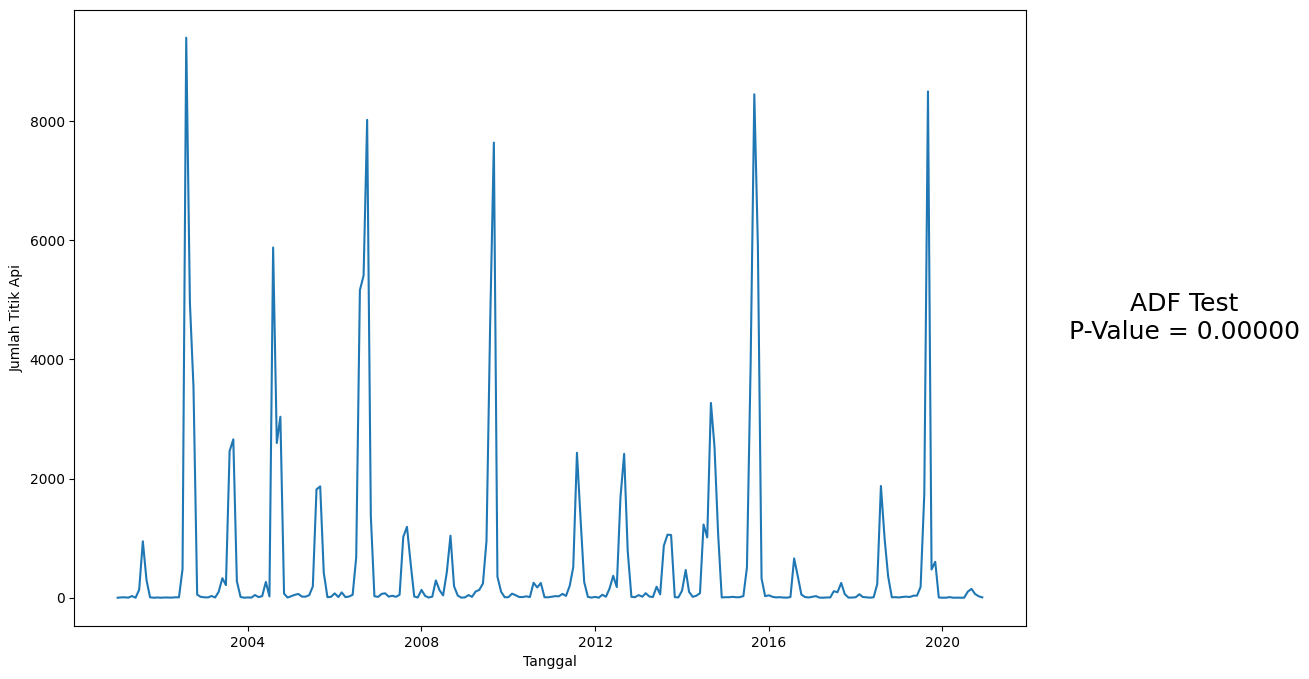

In [9]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,8), gridspec_kw={'width_ratios': [9, 1]})
ax = ax.flatten()

sns.lineplot(x = data.index, y = data["Jumlah Titik Api"], ax = ax[0])

ax[1].text(0.5, 0.5, f"""
ADF Test
P-Value = {adfuller(data["Jumlah Titik Api"])[1]:.5f}
""", fontsize = 18, ha = 'center', va = 'center')

sns.despine(ax = ax[1], left = True, bottom = True)
ax[1].set_xticks([])  # Remove xticks
ax[1].set_yticks([])  # Remove yticks

# Set axis limits (optional)
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

fig.savefig("Trend Hotspot.svg", dpi = 600)

plt.show()

In [10]:
adfuller(data["Jumlah Titik Api"])[1]

1.5866798643062344e-14

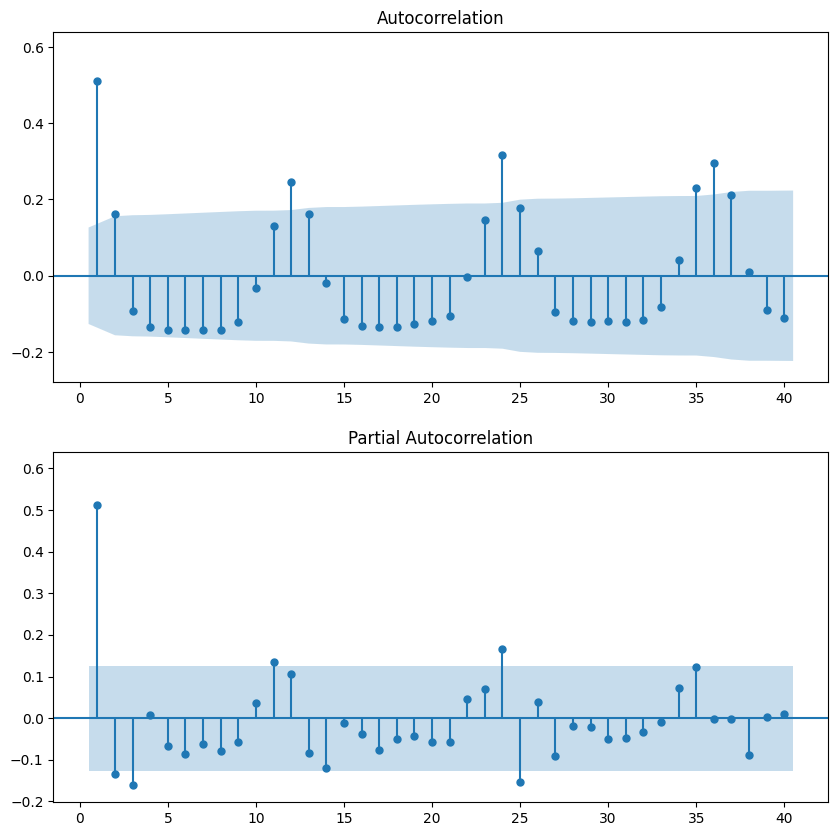

In [11]:
### ACF and PACF
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))

plot_acf(data["Jumlah Titik Api"], lags = 40, zero = False, auto_ylims = True, ax =  ax[0])
plot_pacf(data["Jumlah Titik Api"], lags = 40, zero = False, auto_ylims = True, ax =  ax[1])



fig.savefig("ACF and PACF.svg", dpi = 600)

plt.show();

### Create the distribution from the data

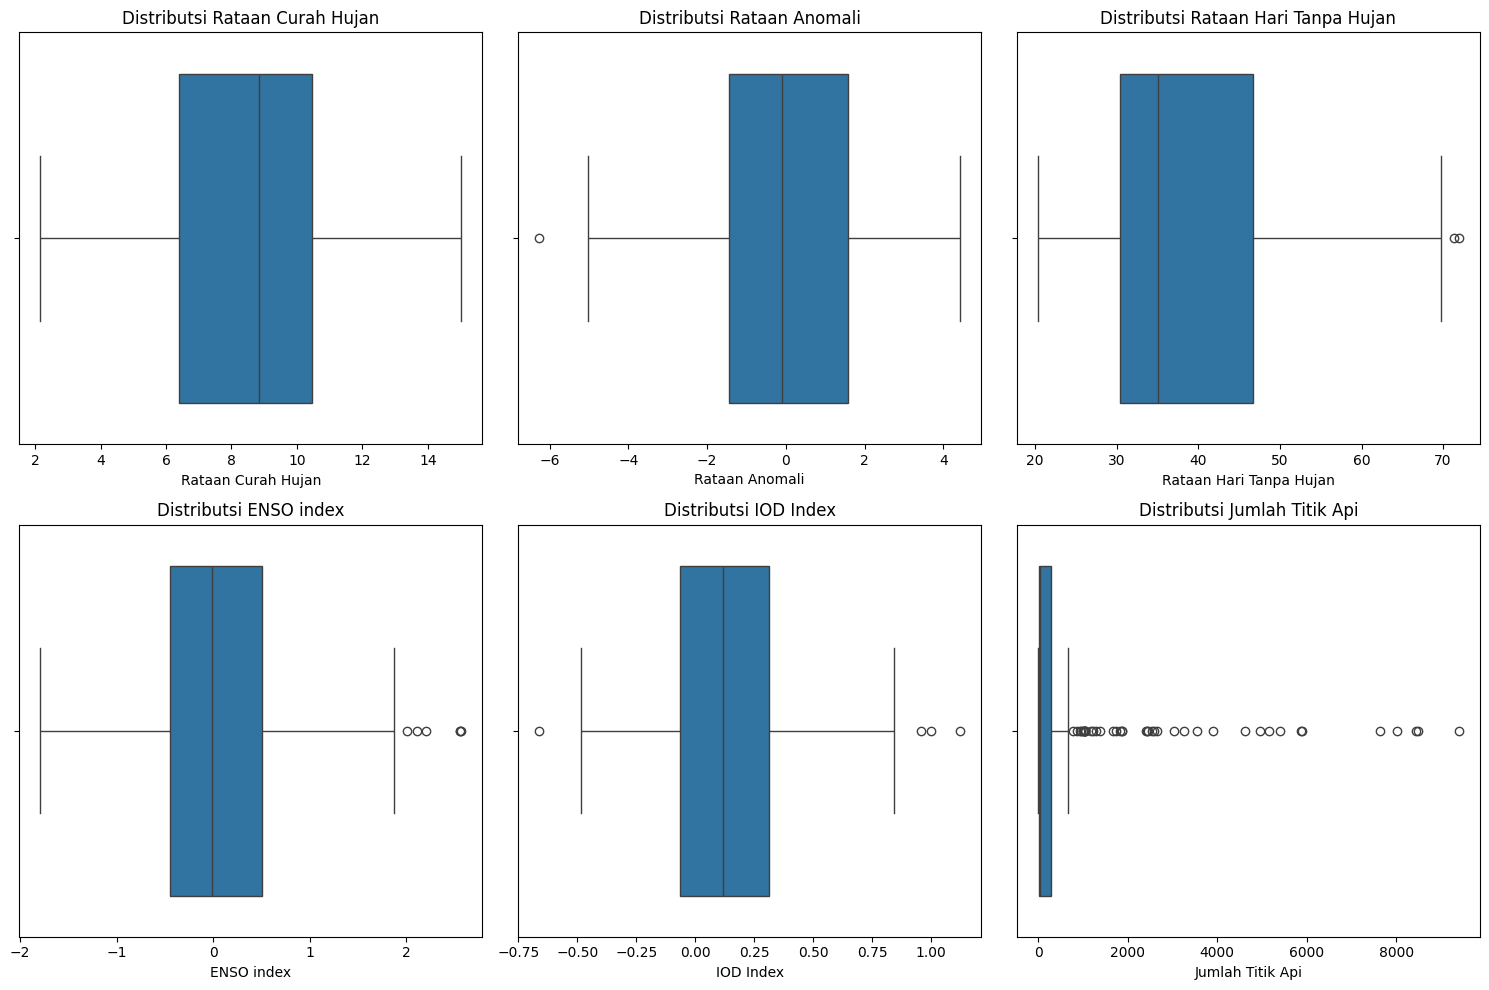

In [12]:
# Create figure and axes
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
ax = ax.flatten()

# Create boxplot
for x, y in enumerate(data):
    sns.boxplot(data = data,
                x = data[y],
                ax = ax[x])
    # Create chart title
    ax[x].set_title(f"Distributsi {y}")

# adjust layout
fig.tight_layout()

# Show the plot
plt.show()

## Data Preprocessing

In [13]:
# Create Function to Define Feature and Label with a Certain Lag
def X_y(data, lag):
    to_array = data.to_numpy()
    X = []
    y = []
    for i in range(len(to_array)-lag):
        row = [r for r in to_array[i:i+lag]]
        X.append(row)
        label = to_array[i + lag][5]
        y.append(label)
    return np.array(X), np.array(y)

In [14]:
X, y = X_y(data, lag = 12)
X.shape, y.shape

((228, 12, 6), (228,))

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 12, 6), (46, 12, 6), (182,), (46,))

## Modeling

In [16]:
# define RMSE as the costume lost function
def root_mean_squared_error(y_true, y_pred):
    # Ensure that both inputs have the same data type (e.g., float32)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate RMSE
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))
    
    return rmse

# define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 patience = 25,
                                                 restore_best_weights = True)

In [17]:
# Create function for loss function plot

def loss_plot(history, save_image = False, file_name = None):
    fig, ax = plt.subplots(figsize = (15,10))

    sns.lineplot(x = range(0, len(history.history["loss"])), y = history.history["loss"], label = "Training")
    
    sns.lineplot(x =  range(0, len(history.history["val_loss"])), y = history.history["val_loss"], label = "Testing")
    
    plt.legend(fontsize = 18)
    
    if save_image ==True:
        if file_name != None:
            assert KeyError("Please insert file_name")
        else:
            fig.savefig(file_name, dpi = 600)
    
    plt.show();

In [19]:
# Create function predicted vs actual

def predict_actual_plot(y_train, y_test, y_pred_train, y_pred_test, save_image = False, file_name = None):
    train = pd.DataFrame()
    train["Tanggal"] = data.index[data.index >= data.index[240-y.shape[0]]][:y_train.shape[0]]
    train["Actual"] = y_train
    train["Predict"] = y_pred_train
    
    test = pd.DataFrame()
    test["Tanggal"] = data.index[data.index >= data.index[240-y.shape[0]]][y_train.shape[0]:]
    test["Actual"] = y_test
    test["Predict"] = y_pred_test
    
    # Membuat plot
    fig, ax = plt.subplots(figsize = (15,8))
    
    sns.lineplot(data = train, x = "Tanggal", y = "Predict", color = "red", label = "Predicted train")
    sns.lineplot(data = test, x = "Tanggal", y = "Predict", color = "black", label = "Predicted test")
    sns.lineplot(data = train, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")
    sns.lineplot(data = test, x = "Tanggal", y = "Actual", color = "blue", label = "Actual")

    if save_image ==True:
        if file_name != None:
            assert KeyError("Please insert file_name")
        else:
            fig.savefig(file_name, dpi = 600)
    
    plt.show()

### 1 LSTM 1 Dense

In [19]:
# define model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
              metrics = [root_mean_squared_error])

history = model.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])


Epoch 1/500


6/6 [==============================] - 7s 176ms/step - loss: 1715.9637 - root_mean_squared_error: 1704.9152 - val_loss: 1153.1132 - val_root_mean_squared_error: 876.3168
Epoch 2/500
6/6 [==============================] - 0s 18ms/step - loss: 1726.0240 - root_mean_squared_error: 1733.6473 - val_loss: 1152.9376 - val_root_mean_squared_error: 876.1331
Epoch 3/500
6/6 [==============================] - 0s 16ms/step - loss: 1722.0490 - root_mean_squared_error: 1704.0675 - val_loss: 1152.7349 - val_root_mean_squared_error: 875.9099
Epoch 4/500
6/6 [==============================] - 0s 16ms/step - loss: 1661.3007 - root_mean_squared_error: 1664.5938 - val_loss: 1152.4382 - val_root_mean_squared_error: 875.5915
Epoch 5/500
6/6 [==============================] - 0s 14ms/step - loss: 1671.5875 - root_mean_squared_error: 1707.2544 - val_loss: 1152.0366 - val_root_mean_squared_error: 875.1712
Epoch 6/500
6/6 [==============================] - 0s 16ms/step - loss: 1664.4843 - root_me

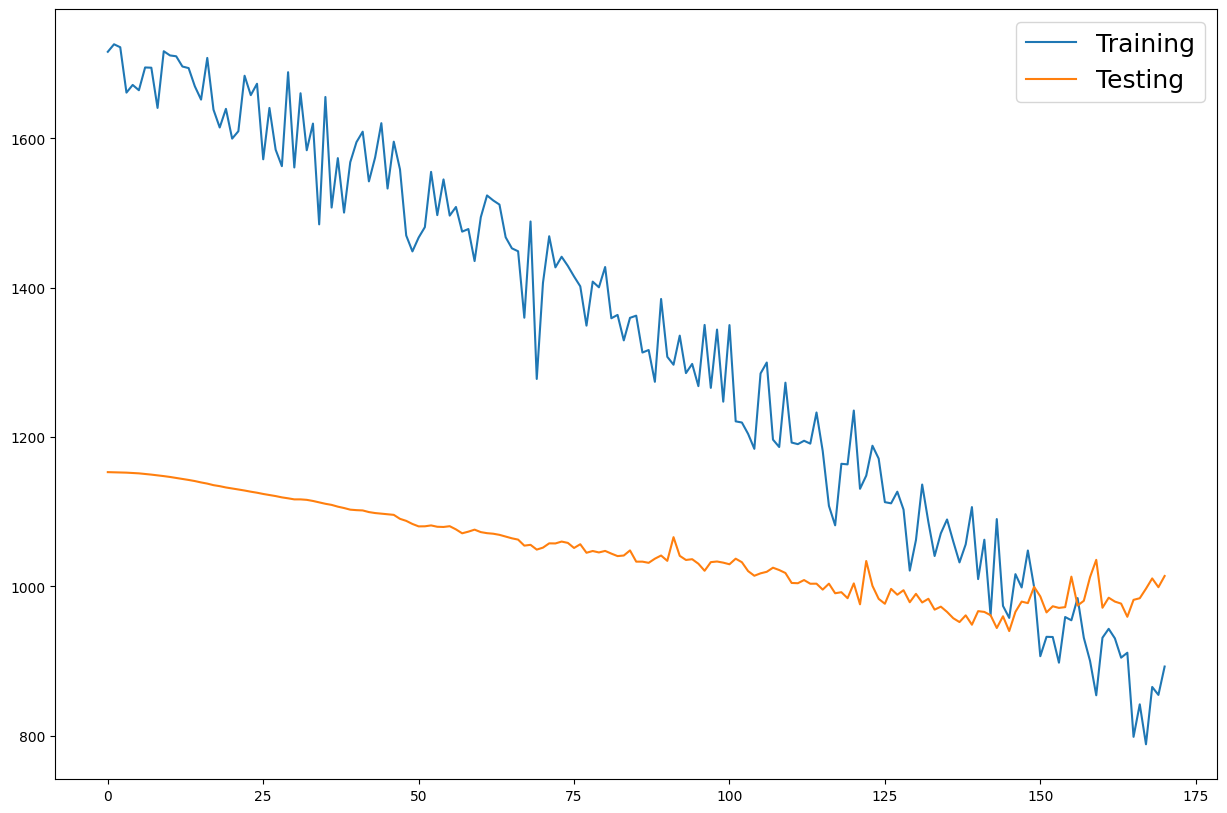

In [21]:
# Create loss function plot
loss_plot(history)

In [22]:
y_pred_train = model.predict(X_train).reshape(-1)
y_pred_test = model.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train)}
Testing    = {root_mean_squared_error(y_test, y_pred_test)}
""")

2/2 [==============================] - 0s 8ms/step

RMSE
Traning    = 1087.3541259765625
Testing    = 990.9488525390625



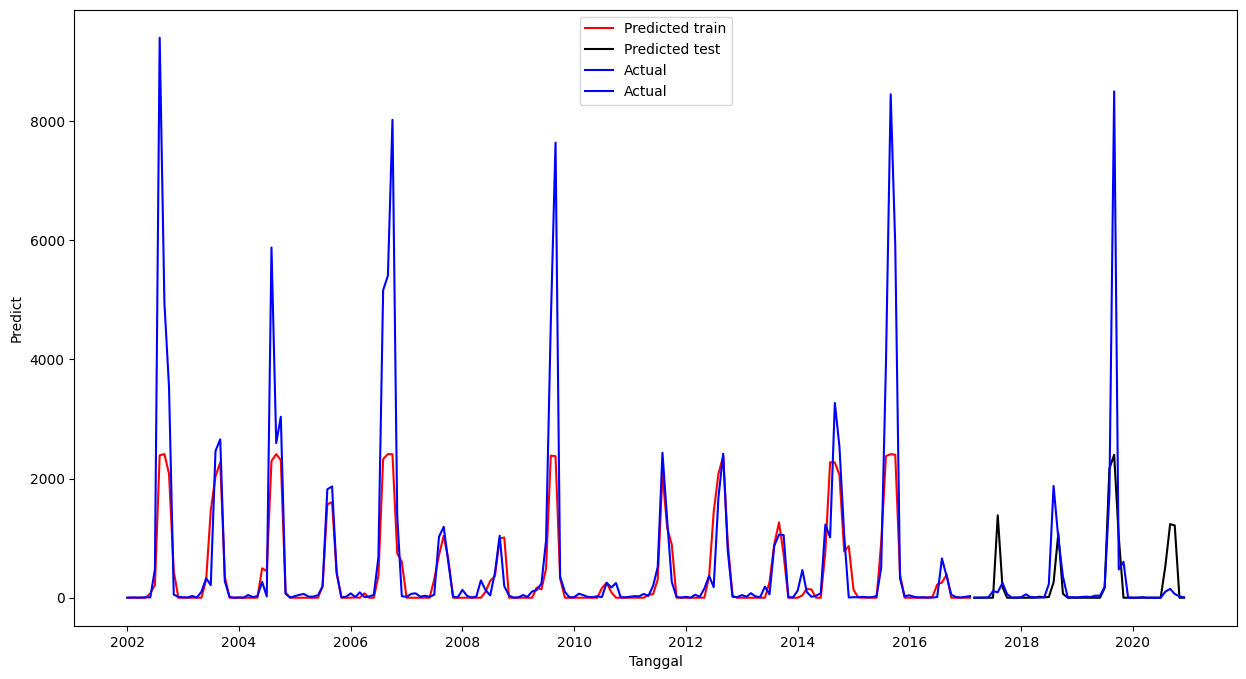

In [23]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train, y_pred_test)

### 2 LSTM 1 Dense

In [24]:
# define model
model1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh'),
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model1.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
               metrics = [root_mean_squared_error])

history1 = model1.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 11s 293ms/step - loss: 1684.4695 - root_mean_squared_error: 1646.1761 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 2/500
6/6 [==============================] - 0s 19ms/step - loss: 1596.7898 - root_mean_squared_error: 1696.9681 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 3/500
6/6 [==============================] - 0s 19ms/step - loss: 1580.2345 - root_mean_squared_error: 1533.7041 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 4/500
6/6 [==============================] - 0s 22ms/step - loss: 1661.0739 - root_mean_squared_error: 1637.9829 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 5/500
6/6 [==============================] - 0s 21ms/step - loss: 1724.8086 - root_mean_squared_error: 1720.4435 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 6/500
6/6 [==============================] - 0s 22ms/step - loss: 1686.8564 - root_mean

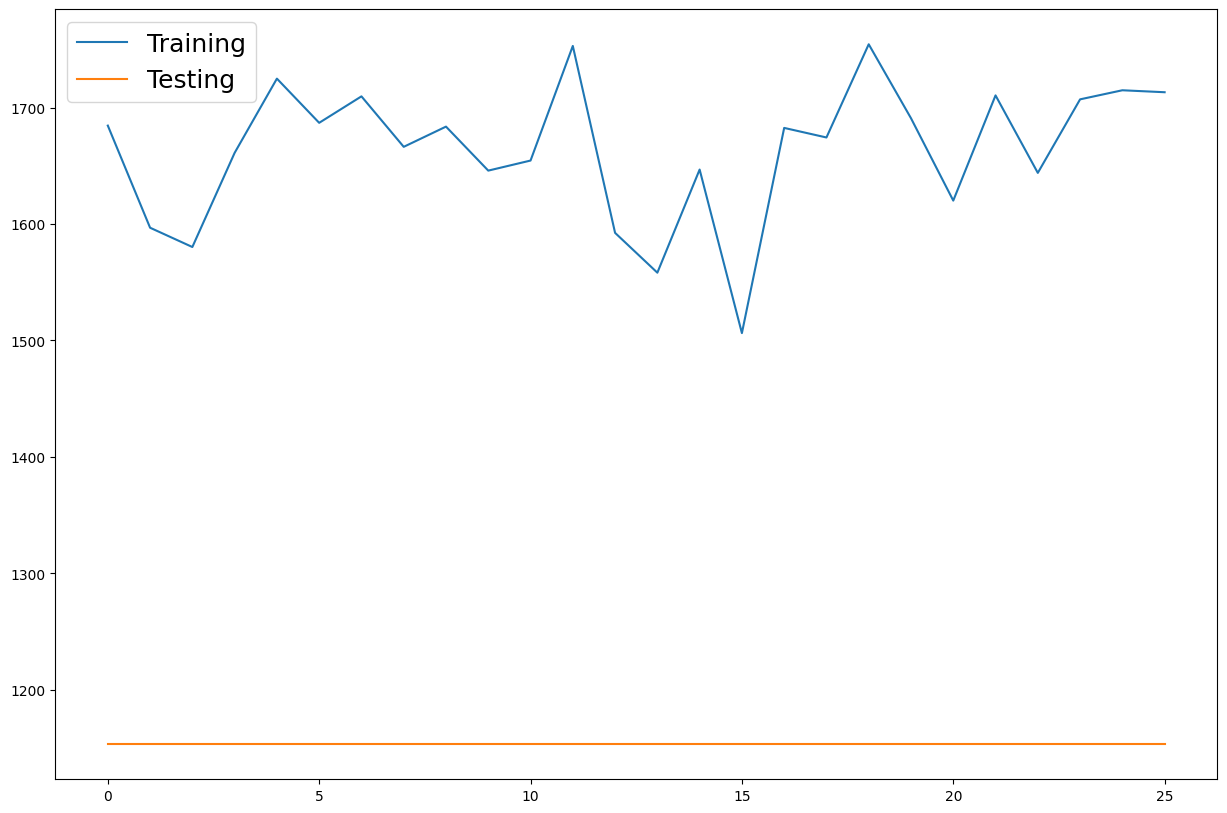

In [25]:
# Create loss function plot
loss_plot(history1)

In [26]:
y_pred_train1 = model1.predict(X_train).reshape(-1)
y_pred_test1 = model1.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train1)}
Testing    = {root_mean_squared_error(y_test, y_pred_test1)}
""")

2/2 [==============================] - 0s 8ms/step

RMSE
Traning    = 1766.9794921875
Testing    = 1324.3118896484375



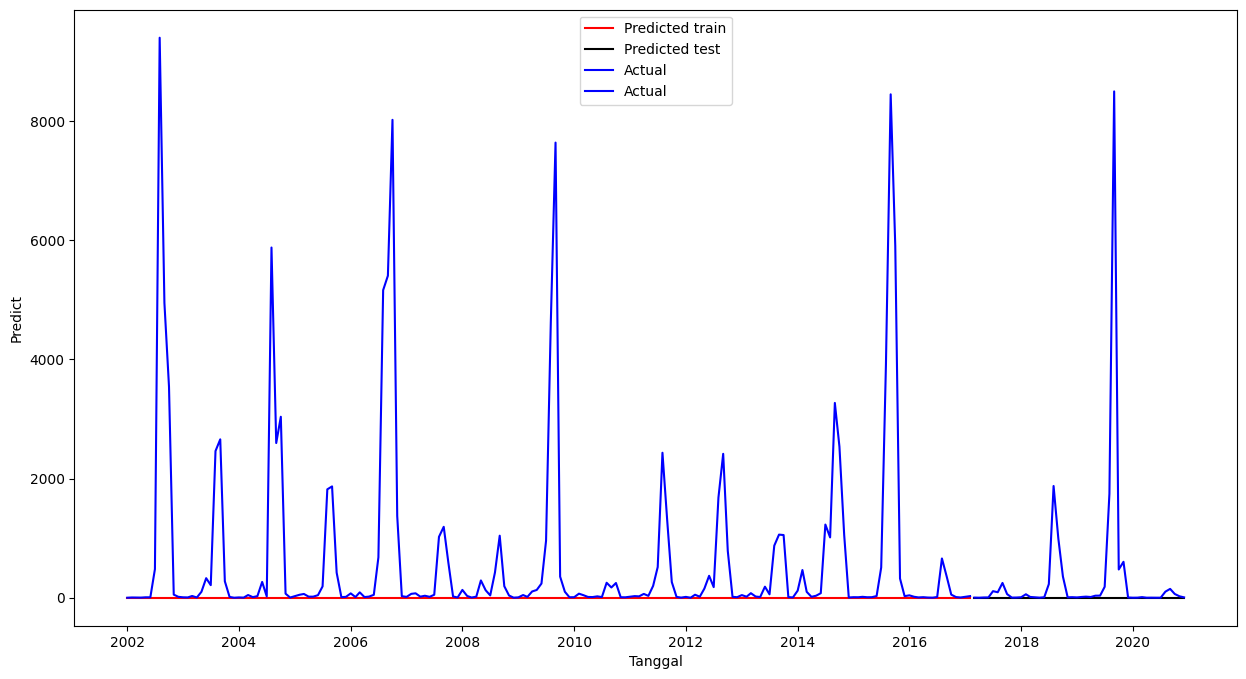

In [27]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train1, y_pred_test1)

### 1 LSTM 2 Dense

In [28]:
# define model
model3 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

model3.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
              metrics = [root_mean_squared_error])

history3 = model3.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 6s 174ms/step - loss: 1623.7648 - root_mean_squared_error: 1627.2676 - val_loss: 1152.9927 - val_root_mean_squared_error: 876.1871
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 1699.6561 - root_mean_squared_error: 1663.0098 - val_loss: 1152.4966 - val_root_mean_squared_error: 875.6638
Epoch 3/500
6/6 [==============================] - 0s 16ms/step - loss: 1694.0765 - root_mean_squared_error: 1748.1840 - val_loss: 1151.8135 - val_root_mean_squared_error: 874.9395
Epoch 4/500
6/6 [==============================] - 0s 15ms/step - loss: 1710.4847 - root_mean_squared_error: 1680.1064 - val_loss: 1150.8875 - val_root_mean_squared_error: 873.9719
Epoch 5/500
6/6 [==============================] - 0s 16ms/step - loss: 1611.3568 - root_mean_squared_error: 1606.4813 - val_loss: 1149.6853 - val_root_mean_squared_error: 872.7068
Epoch 6/500
6/6 [==============================] - 0s 14ms/step - loss: 1687.9104 - root_mean_

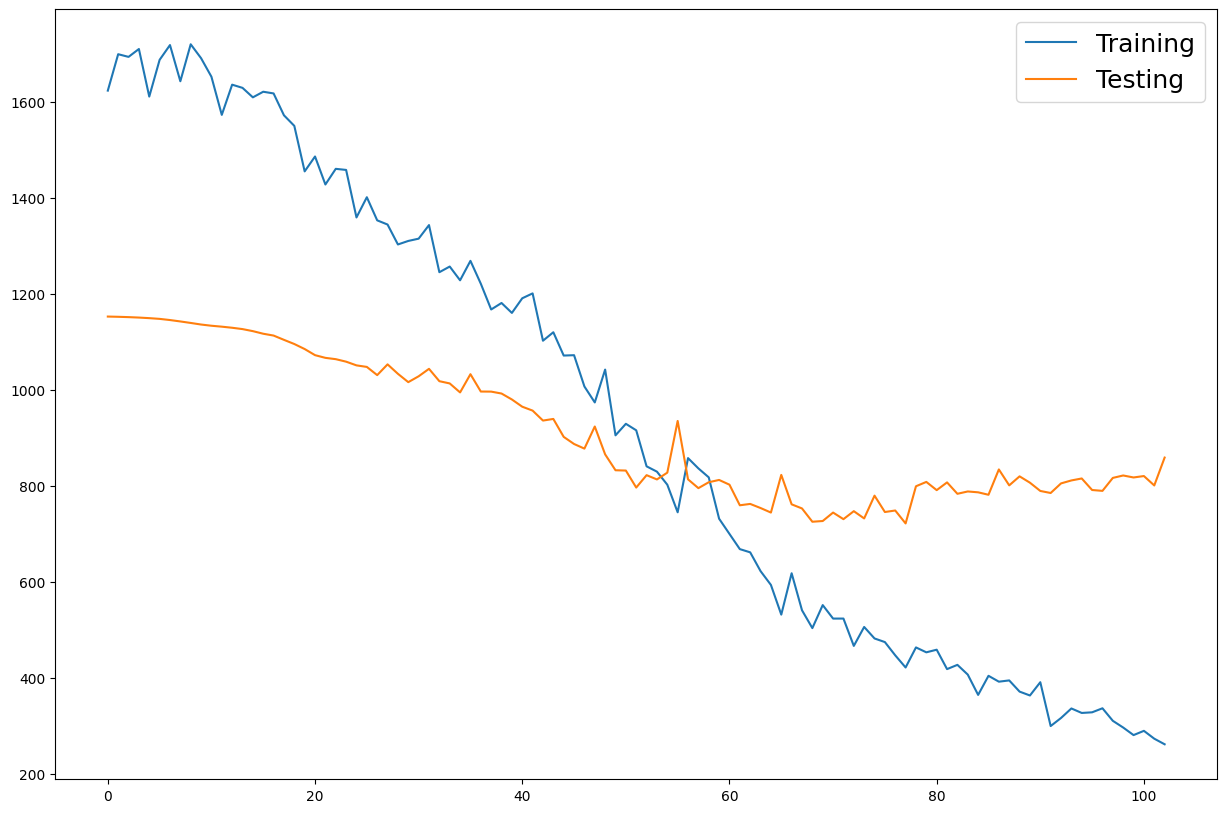

In [29]:
# Create loss function plot
loss_plot(history3)

In [30]:
y_pred_train3 = model3.predict(X_train).reshape(-1)
y_pred_test3 = model3.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train3)}
Testing    = {root_mean_squared_error(y_test, y_pred_test3)}
""")

2/2 [==============================] - 0s 8ms/step

RMSE
Traning    = 454.0045471191406
Testing    = 810.3341674804688



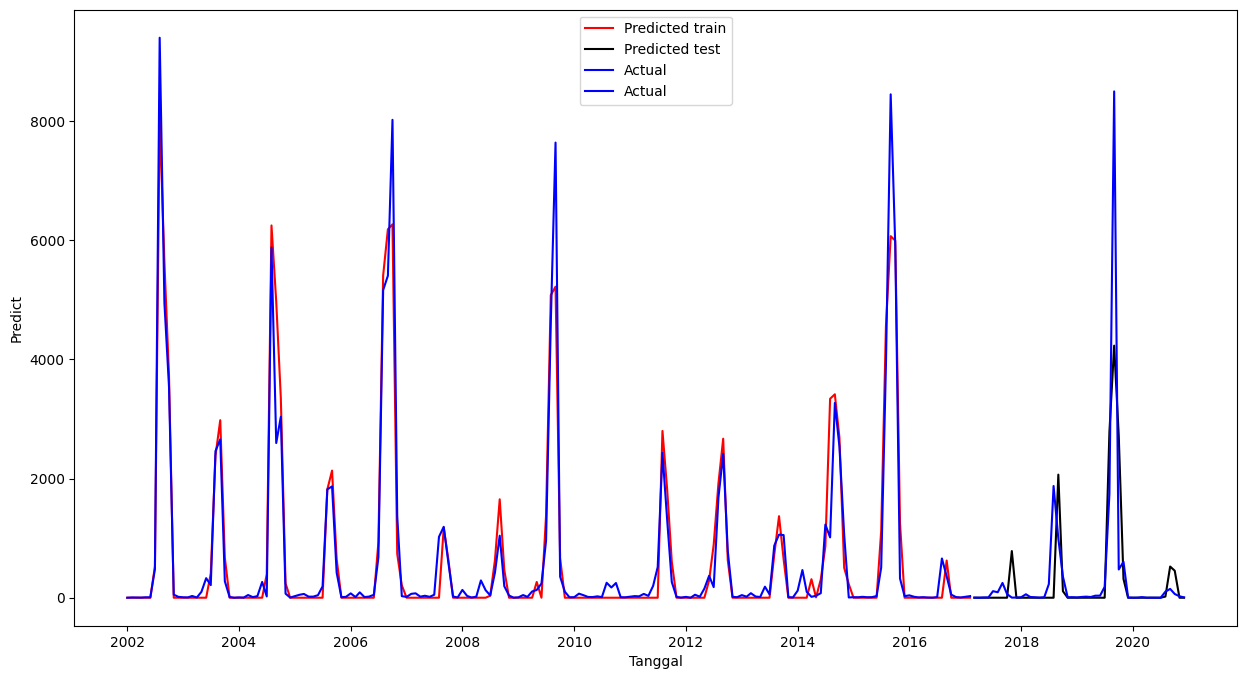

In [31]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train3, y_pred_test3)

### 2 LSTM 2 Dense

In [32]:
# define model
model4 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh'),
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model4.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
               metrics = [root_mean_squared_error])

history4 = model4.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 11s 321ms/step - loss: 1655.6469 - root_mean_squared_error: 1628.5387 - val_loss: 1153.0463 - val_root_mean_squared_error: 876.2481
Epoch 2/500
6/6 [==============================] - 0s 29ms/step - loss: 1662.1327 - root_mean_squared_error: 1726.4907 - val_loss: 1152.4838 - val_root_mean_squared_error: 875.6514
Epoch 3/500
6/6 [==============================] - 0s 26ms/step - loss: 1629.9868 - root_mean_squared_error: 1598.5356 - val_loss: 1151.5044 - val_root_mean_squared_error: 874.6177
Epoch 4/500
6/6 [==============================] - 0s 24ms/step - loss: 1654.8925 - root_mean_squared_error: 1688.0353 - val_loss: 1150.0986 - val_root_mean_squared_error: 873.1450
Epoch 5/500
6/6 [==============================] - 0s 24ms/step - loss: 1641.6608 - root_mean_squared_error: 1664.9320 - val_loss: 1148.1786 - val_root_mean_squared_error: 871.1675
Epoch 6/500
6/6 [==============================] - 0s 26ms/step - loss: 1609.9961 - root_mean

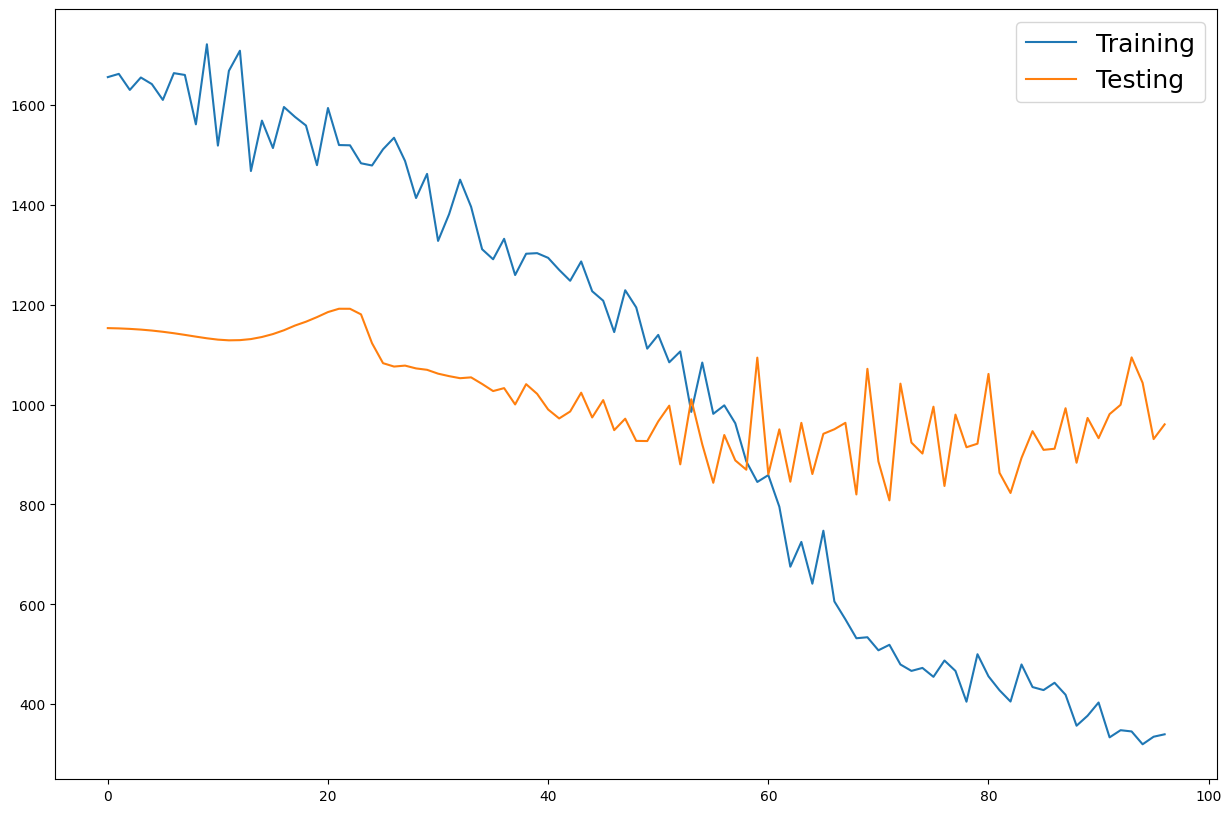

In [33]:
# Create loss function plot
loss_plot(history4)

In [34]:
y_pred_train4 = model4.predict(X_train).reshape(-1)
y_pred_test4 = model4.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train4)}
Testing    = {root_mean_squared_error(y_test, y_pred_test4)}
""")

2/2 [==============================] - 0s 0s/step

RMSE
Traning    = 551.7792358398438
Testing    = 865.9860229492188



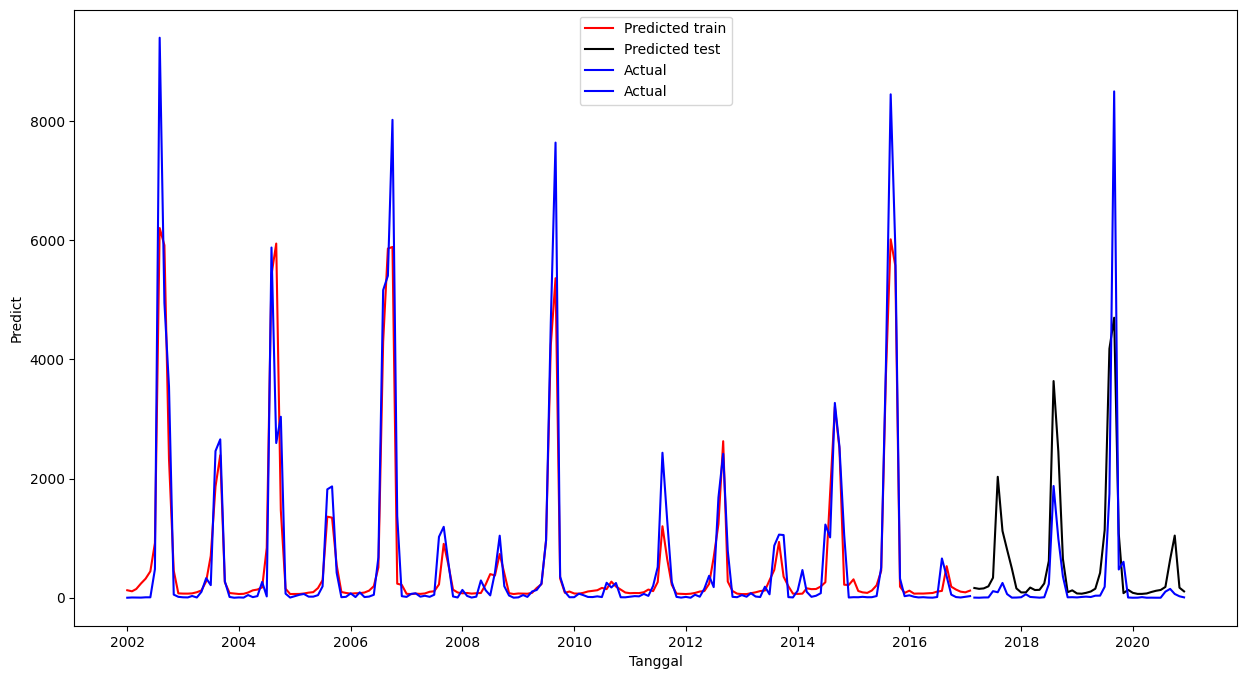

In [35]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train4, y_pred_test4)

### 1 LSTM 3 Dense

In [36]:
# define model
model5 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model5.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
               metrics = [root_mean_squared_error])

history5 = model5.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 8s 408ms/step - loss: 1713.1642 - root_mean_squared_error: 1686.4198 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 2/500
6/6 [==============================] - 0s 26ms/step - loss: 1649.4595 - root_mean_squared_error: 1586.5890 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 3/500
6/6 [==============================] - 0s 27ms/step - loss: 1595.6990 - root_mean_squared_error: 1649.4921 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 4/500
6/6 [==============================] - 0s 24ms/step - loss: 1672.9742 - root_mean_squared_error: 1654.4839 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 5/500
6/6 [==============================] - 0s 26ms/step - loss: 1673.9847 - root_mean_squared_error: 1679.6859 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 6/500
6/6 [==============================] - 0s 24ms/step - loss: 1582.0920 - root_mean_

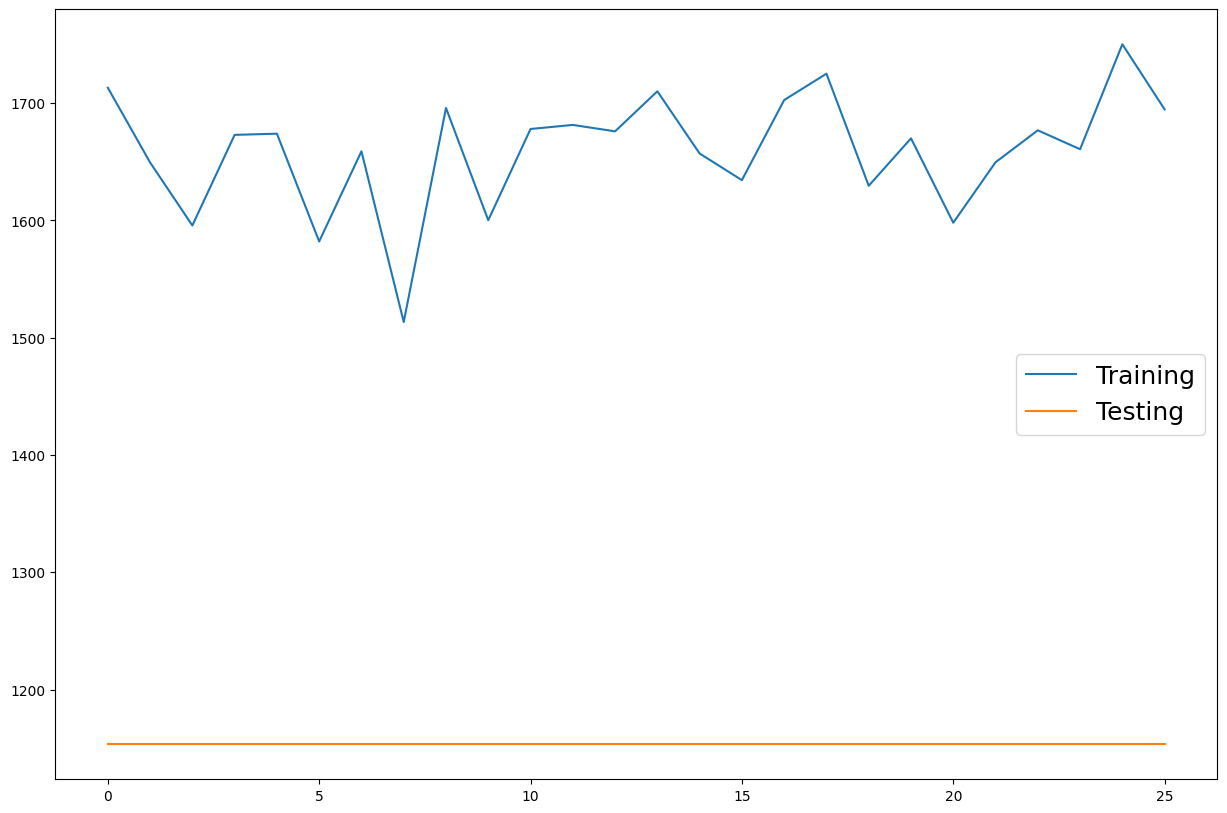

In [37]:
# Create loss function plot
loss_plot(history5)

In [38]:
y_pred_train5 = model5.predict(X_train).reshape(-1)
y_pred_test5 = model5.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train5)}
Testing    = {root_mean_squared_error(y_test, y_pred_test5)}
""")

2/2 [==============================] - 0s 8ms/step

RMSE
Traning    = 1766.9794921875
Testing    = 1324.3118896484375



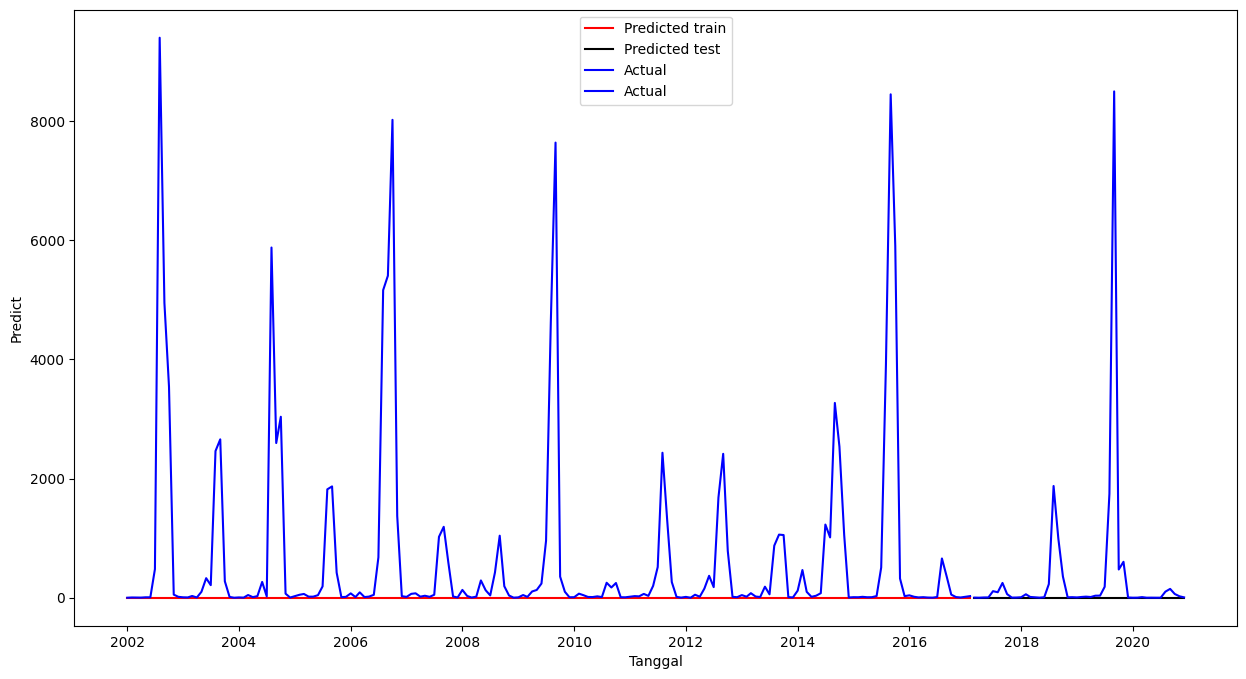

In [39]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train5, y_pred_test5)

### 2 LSTM 3 Dense

In [40]:
# define model
model6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh'),
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model6.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
               metrics = [root_mean_squared_error])

history6 = model6.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 22s 616ms/step - loss: 1728.3635 - root_mean_squared_error: 1755.2665 - val_loss: 1153.0961 - val_root_mean_squared_error: 876.2990
Epoch 2/500
6/6 [==============================] - 0s 42ms/step - loss: 1602.2151 - root_mean_squared_error: 1558.6161 - val_loss: 1152.4089 - val_root_mean_squared_error: 875.5743
Epoch 3/500
6/6 [==============================] - 0s 32ms/step - loss: 1684.5479 - root_mean_squared_error: 1673.4454 - val_loss: 1150.7643 - val_root_mean_squared_error: 873.8428
Epoch 4/500
6/6 [==============================] - 0s 38ms/step - loss: 1694.4227 - root_mean_squared_error: 1667.2064 - val_loss: 1147.6857 - val_root_mean_squared_error: 870.6656
Epoch 5/500
6/6 [==============================] - 0s 35ms/step - loss: 1623.1376 - root_mean_squared_error: 1571.4095 - val_loss: 1143.3158 - val_root_mean_squared_error: 866.3486
Epoch 6/500
6/6 [==============================] - 0s 34ms/step - loss: 1694.3168 - root_mean

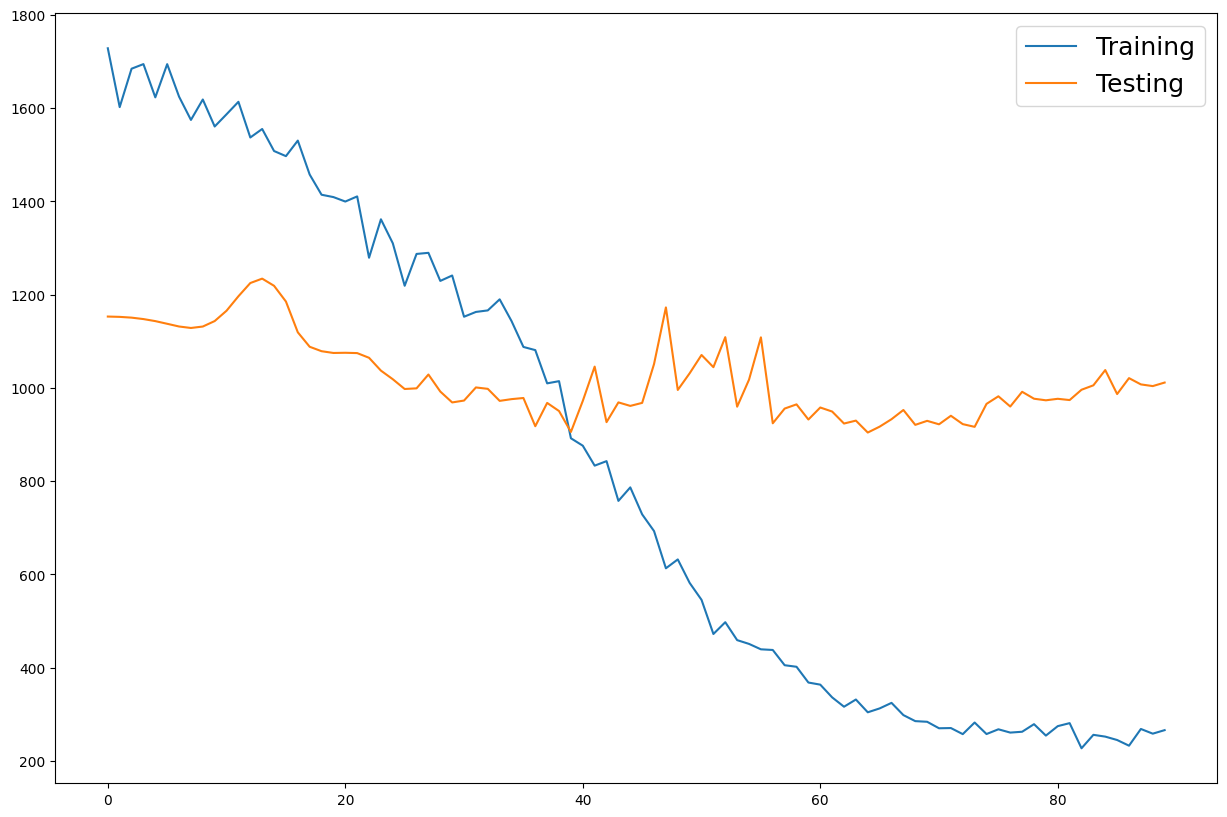

In [42]:
# Create loss function plot
loss_plot(history6)

In [43]:
y_pred_train6 = model6.predict(X_train).reshape(-1)
y_pred_test6 = model6.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train6)}
Testing    = {root_mean_squared_error(y_test, y_pred_test6)}
""")

2/2 [==============================] - 0s 7ms/step

RMSE
Traning    = 315.1393127441406
Testing    = 985.8705444335938



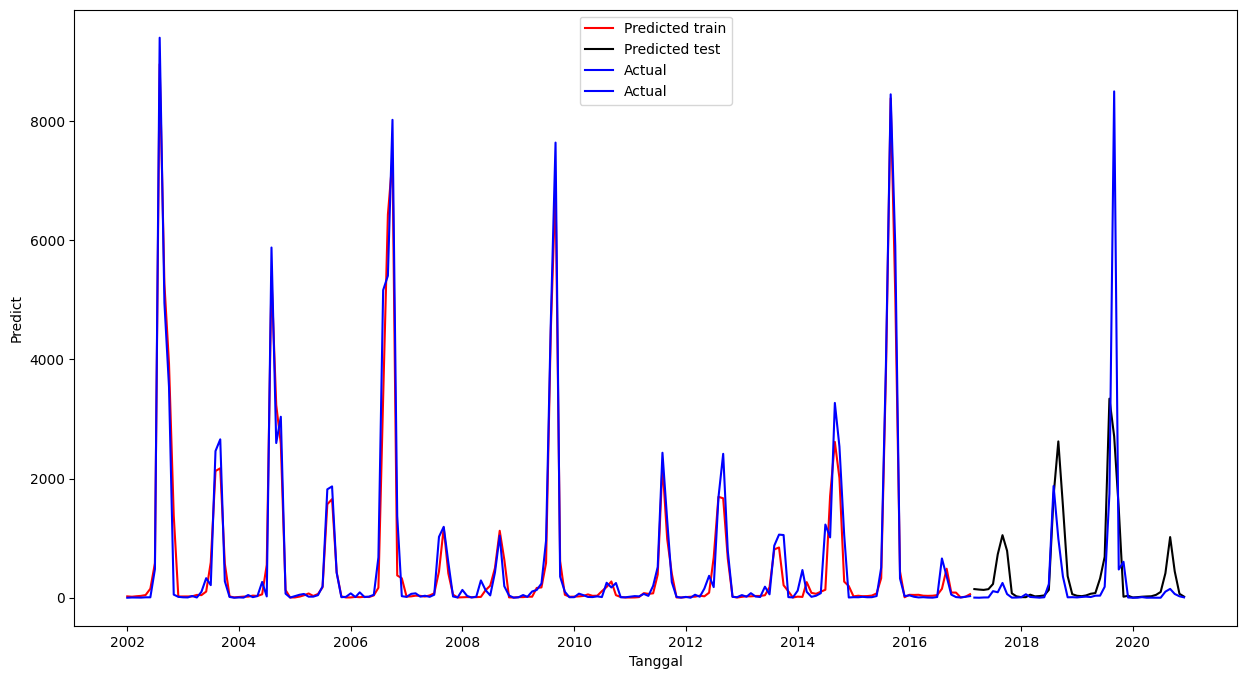

In [44]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train6, y_pred_test6)

### 1 LSTM 4 Dense

In [45]:
# define model
model7 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model7.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
               metrics = [root_mean_squared_error])

history7 = model7.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 7s 178ms/step - loss: 1709.0242 - root_mean_squared_error: 1650.8478 - val_loss: 1153.1843 - val_root_mean_squared_error: 876.3920
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 1742.9819 - root_mean_squared_error: 1713.9449 - val_loss: 1152.9460 - val_root_mean_squared_error: 876.1409
Epoch 3/500
6/6 [==============================] - 0s 20ms/step - loss: 1660.2896 - root_mean_squared_error: 1719.2090 - val_loss: 1152.4052 - val_root_mean_squared_error: 875.5576
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 1635.7990 - root_mean_squared_error: 1664.7944 - val_loss: 1151.2523 - val_root_mean_squared_error: 874.3355
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 1652.7581 - root_mean_squared_error: 1632.9043 - val_loss: 1148.6022 - val_root_mean_squared_error: 871.6127
Epoch 6/500
6/6 [==============================] - 0s 15ms/step - loss: 1618.1068 - root_mean_

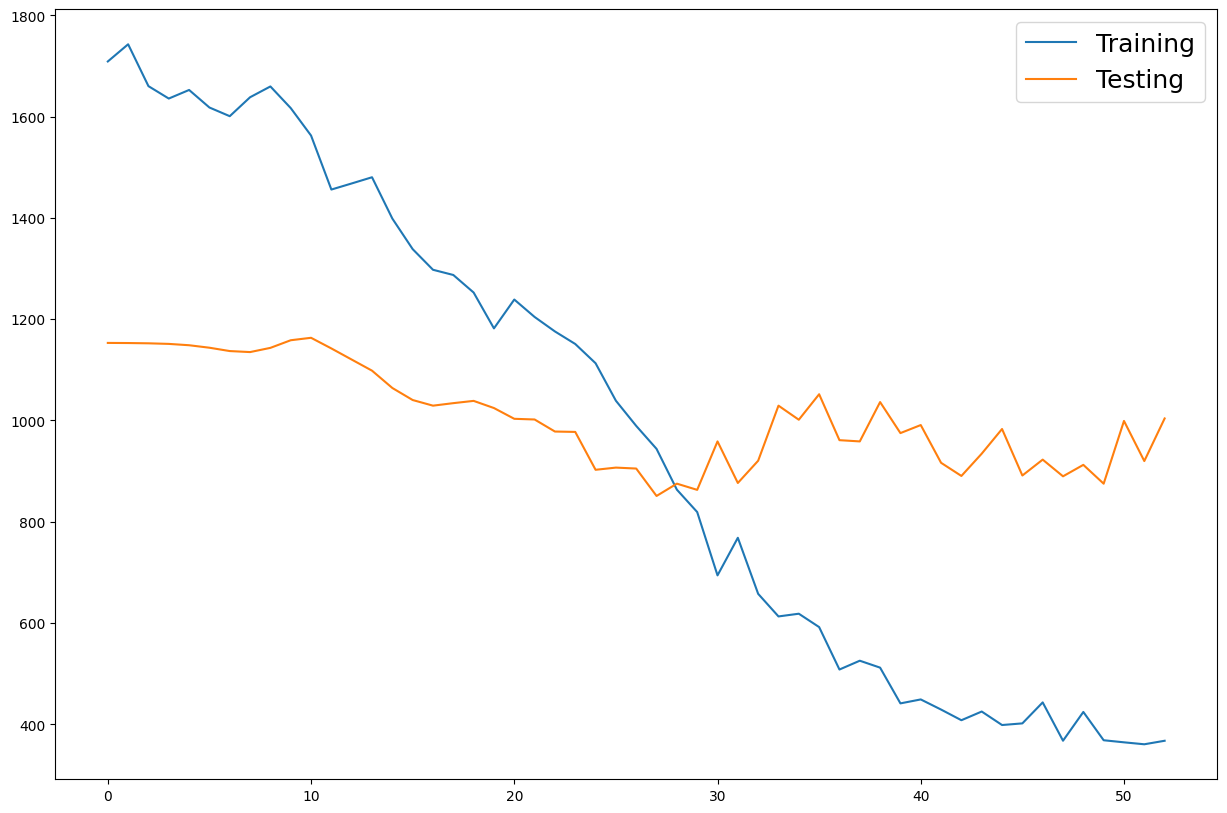

In [46]:
# Create loss function plot
loss_plot(history7)

In [47]:
y_pred_train7 = model7.predict(X_train).reshape(-1)
y_pred_test7 = model7.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train7)}
Testing    = {root_mean_squared_error(y_test, y_pred_test7)}
""")

2/2 [==============================] - 0s 4ms/step

RMSE
Traning    = 878.7359619140625
Testing    = 886.3385620117188



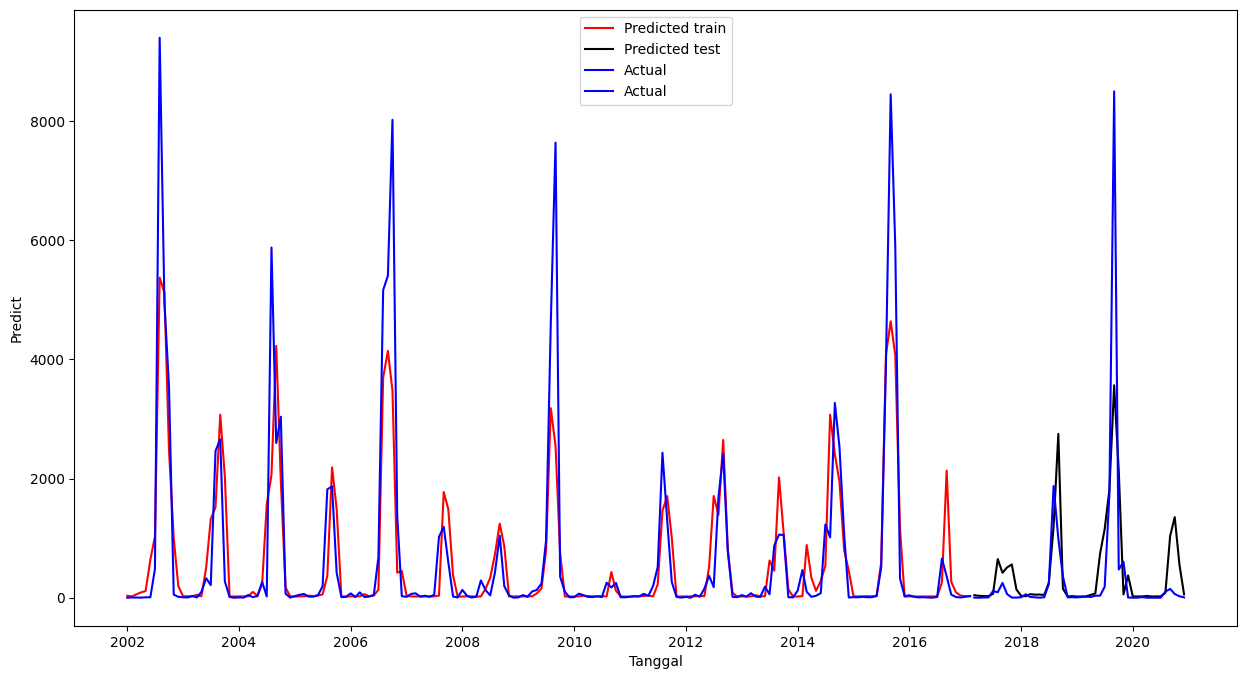

In [48]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train7, y_pred_test7)

### 2 LSTM 4 Dense

In [49]:
# define model
model8 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh'),
    tf.keras.layers.LSTM(64, activation = 'tanh'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "relu")
])

model8.compile(loss = root_mean_squared_error,
              optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
               metrics = [root_mean_squared_error])

history8 = model8.fit(X_train, y_train, epochs = 500, validation_data = (X_test, y_test), callbacks = [early_stopping])

Epoch 1/500
6/6 [==============================] - 11s 322ms/step - loss: 1702.6833 - root_mean_squared_error: 1688.7943 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 2/500
6/6 [==============================] - 0s 24ms/step - loss: 1662.5879 - root_mean_squared_error: 1663.3384 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 3/500
6/6 [==============================] - 0s 31ms/step - loss: 1653.2600 - root_mean_squared_error: 1657.5680 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 4/500
6/6 [==============================] - 0s 30ms/step - loss: 1718.6748 - root_mean_squared_error: 1721.1558 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 5/500
6/6 [==============================] - 0s 43ms/step - loss: 1664.7825 - root_mean_squared_error: 1589.7643 - val_loss: 1153.2903 - val_root_mean_squared_error: 876.5039
Epoch 6/500
6/6 [==============================] - 0s 26ms/step - loss: 1718.9127 - root_mean

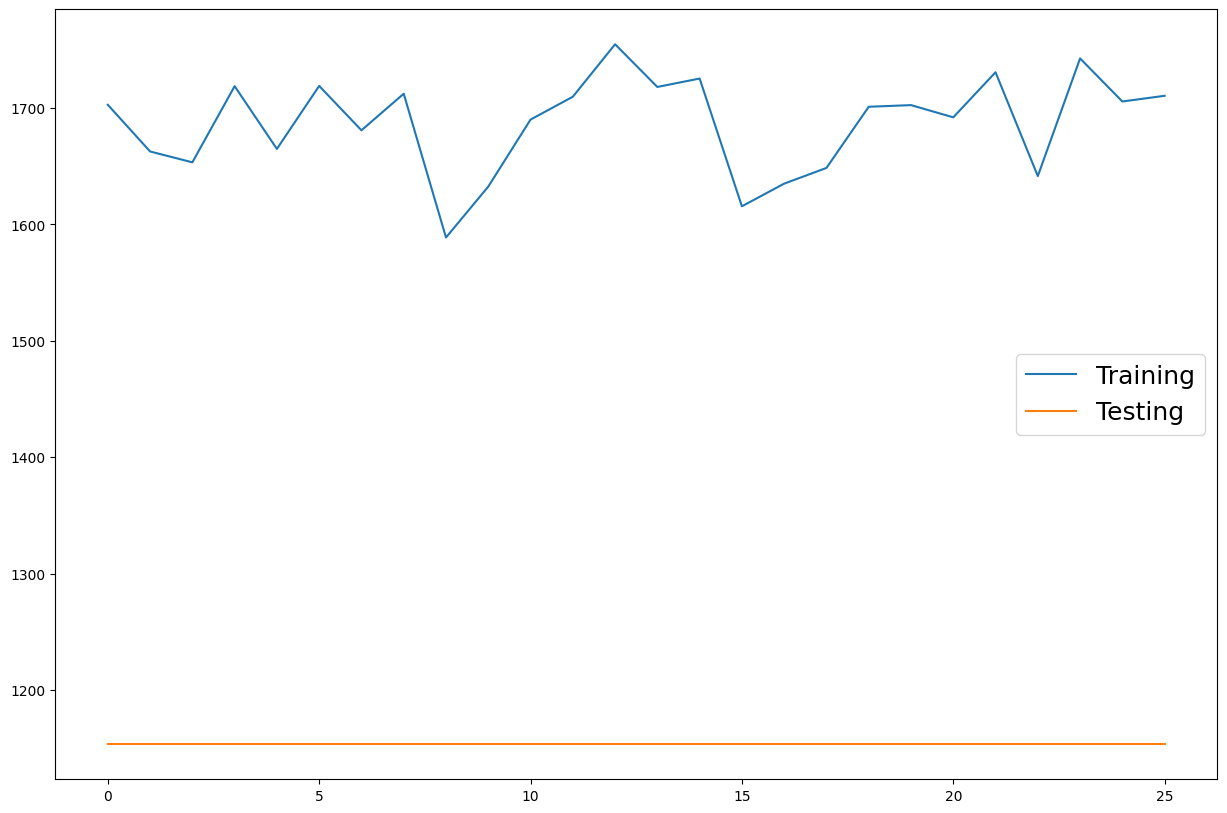

In [50]:
# Create loss function plot
loss_plot(history8)

In [51]:
y_pred_train8 = model8.predict(X_train).reshape(-1)
y_pred_test8 = model8.predict(X_test).reshape(-1)

print(f"""
RMSE
========================================
Traning    = {root_mean_squared_error(y_train, y_pred_train8)}
Testing    = {root_mean_squared_error(y_test, y_pred_test8)}
""")

2/2 [==============================] - 0s 5ms/step

RMSE
Traning    = 1766.9794921875
Testing    = 1324.3118896484375



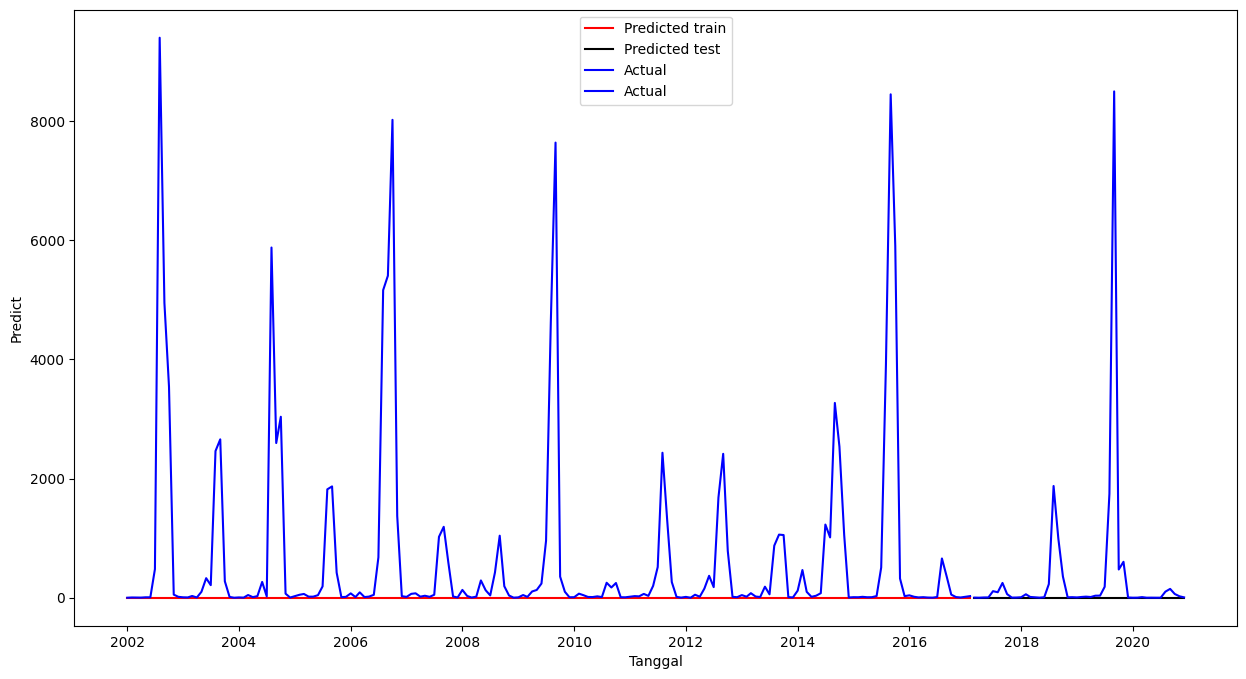

In [52]:
# Create predicted vs actual plot
predict_actual_plot(y_train, y_test, y_pred_train8, y_pred_test8)

## Model Evaluation

### RMSE

In [53]:
rmse = {"Layer" : ["1 LSTM 1 Dense",
                   "2 LSTM 1 Dense",
                   "1 LSTM 2 Dense",
                   "2 LSTM 2 Dense",
                   "1 LSTM 3 Dense",
                   "2 LSTM 3 Dense",
                   "1 LSTM 4 Dense",
                   "2 LSTM 4 Dense",],
        "Training" : [np.array(root_mean_squared_error(y_train, y_pred_train)),
                      np.array(root_mean_squared_error(y_train, y_pred_train1)),
                      np.array(root_mean_squared_error(y_train, y_pred_train3)),
                      np.array(root_mean_squared_error(y_train, y_pred_train4)),
                      np.array(root_mean_squared_error(y_train, y_pred_train5)),
                      np.array(root_mean_squared_error(y_train, y_pred_train6)),
                      np.array(root_mean_squared_error(y_train, y_pred_train7)),
                      np.array(root_mean_squared_error(y_train, y_pred_train8))],
        "Testing" : [np.array(root_mean_squared_error(y_test, y_pred_test)),
                     np.array(root_mean_squared_error(y_test, y_pred_test1)),
                     np.array(root_mean_squared_error(y_test, y_pred_test3)),
                     np.array(root_mean_squared_error(y_test, y_pred_test4)),
                     np.array(root_mean_squared_error(y_test, y_pred_test5)),
                     np.array(root_mean_squared_error(y_test, y_pred_test6)),
                     np.array(root_mean_squared_error(y_test, y_pred_test7)),
                     np.array(root_mean_squared_error(y_test, y_pred_test8))]}

rmse = pd.DataFrame(rmse)
rmse["Metric"] = "RMSE" 
rmse

,Layer,Training,Testing,Metric
0,1 LSTM 1 Dense,1087.3541,990.94885,RMSE
1,2 LSTM 1 Dense,1766.9795,1324.3119,RMSE
2,1 LSTM 2 Dense,454.00455,810.33417,RMSE
3,2 LSTM 2 Dense,551.77924,865.986,RMSE
4,1 LSTM 3 Dense,1766.9795,1324.3119,RMSE
5,2 LSTM 3 Dense,315.1393,985.87054,RMSE
6,1 LSTM 4 Dense,878.73596,886.33856,RMSE
7,2 LSTM 4 Dense,1766.9795,1324.3119,RMSE


### Explain Variance

In [55]:
exp_var = {"Layer" : ["1 LSTM 1 Dense",
                   "2 LSTM 1 Dense",
                   "1 LSTM 2 Dense",
                   "2 LSTM 2 Dense",
                   "1 LSTM 3 Dense",
                   "2 LSTM 3 Dense",
                   "1 LSTM 4 Dense",
                   "2 LSTM 4 Dense",],
        "Training" : [np.array(explained_variance_score(y_train, y_pred_train)),
                      np.array(explained_variance_score(y_train, y_pred_train1)),
                      np.array(explained_variance_score(y_train, y_pred_train3)),
                      np.array(explained_variance_score(y_train, y_pred_train4)),
                      np.array(explained_variance_score(y_train, y_pred_train5)),
                      np.array(explained_variance_score(y_train, y_pred_train6)),
                      np.array(explained_variance_score(y_train, y_pred_train7)),
                      np.array(explained_variance_score(y_train, y_pred_train8))],
        "Testing" : [np.array(explained_variance_score(y_test, y_pred_test)),
                     np.array(explained_variance_score(y_test, y_pred_test1)),
                     np.array(explained_variance_score(y_test, y_pred_test3)),
                     np.array(explained_variance_score(y_test, y_pred_test4)),
                     np.array(explained_variance_score(y_test, y_pred_test5)),
                     np.array(explained_variance_score(y_test, y_pred_test6)),
                     np.array(explained_variance_score(y_test, y_pred_test7)),
                     np.array(explained_variance_score(y_test, y_pred_test8))]}

exp_var = pd.DataFrame(exp_var)
exp_var

,Layer,Training,Testing
0,1 LSTM 1 Dense,0.5762118215329504,0.4036207539935156
1,2 LSTM 1 Dense,0.0,0.0
2,1 LSTM 2 Dense,0.9218357396468057,0.5988322944700901
3,2 LSTM 2 Dense,0.8855392007652556,0.5887170218489107
4,1 LSTM 3 Dense,0.0,0.0
5,2 LSTM 3 Dense,0.9633040549973766,0.41159130085985274
6,1 LSTM 4 Dense,0.7094406352238329,0.5239435280465321
7,2 LSTM 4 Dense,0.0,0.0


### R Squared

In [56]:
r2 = {"Layer" : ["1 LSTM 1 Dense",
                   "2 LSTM 1 Dense",
                   "1 LSTM 2 Dense",
                   "2 LSTM 2 Dense",
                   "1 LSTM 3 Dense",
                   "2 LSTM 3 Dense",
                   "1 LSTM 4 Dense",
                   "2 LSTM 4 Dense",],
        "Training" : [np.array(r2_score(y_train, y_pred_train)),
                      np.array(r2_score(y_train, y_pred_train1)),
                      np.array(r2_score(y_train, y_pred_train3)),
                      np.array(r2_score(y_train, y_pred_train4)),
                      np.array(r2_score(y_train, y_pred_train5)),
                      np.array(r2_score(y_train, y_pred_train6)),
                      np.array(r2_score(y_train, y_pred_train7)),
                      np.array(r2_score(y_train, y_pred_train8))],
        "Testing" : [np.array(r2_score(y_test, y_pred_test)),
                     np.array(r2_score(y_test, y_pred_test1)),
                     np.array(r2_score(y_test, y_pred_test3)),
                     np.array(r2_score(y_test, y_pred_test4)),
                     np.array(r2_score(y_test, y_pred_test5)),
                     np.array(r2_score(y_test, y_pred_test6)),
                     np.array(r2_score(y_test, y_pred_test7)),
                     np.array(r2_score(y_test, y_pred_test8))]}

r2 = pd.DataFrame(r2)
r2

,Layer,Training,Testing
0,1 LSTM 1 Dense,0.5516370480532562,0.39821312806580256
1,2 LSTM 1 Dense,-0.1839976430221455,-0.07478288269275835
2,1 LSTM 2 Dense,0.9218357395984567,0.5975902727603422
3,2 LSTM 2 Dense,0.8845434718932322,0.5404191934646305
4,1 LSTM 3 Dense,-0.1839976430221455,-0.07478288269275835
5,2 LSTM 3 Dense,0.9623388978384095,0.40436536653842925
6,1 LSTM 4 Dense,0.707177417319358,0.5185629796942299
7,2 LSTM 4 Dense,-0.1839976430221455,-0.07478288269275835


### Number of Epochs

In [57]:
epoch = {"Layer" : ["1 LSTM 1 Dense",
                   "2 LSTM 1 Dense",
                   "1 LSTM 2 Dense",
                   "2 LSTM 2 Dense",
                   "1 LSTM 3 Dense",
                   "2 LSTM 3 Dense",
                   "1 LSTM 4 Dense",
                   "2 LSTM 4 Dense"],
        "Epochs" : [len(history.history["loss"]),
                      len(history1.history["loss"]),
                      len(history3.history["loss"]),
                      len(history4.history["loss"]),
                      len(history5.history["loss"]),
                      len(history6.history["loss"]),
                      len(history7.history["loss"]),
                      len(history8.history["loss"])]}

epoch = pd.DataFrame(epoch)
epoch

,Layer,Epochs
0,1 LSTM 1 Dense,171
1,2 LSTM 1 Dense,26
2,1 LSTM 2 Dense,103
3,2 LSTM 2 Dense,97
4,1 LSTM 3 Dense,26
5,2 LSTM 3 Dense,90
6,1 LSTM 4 Dense,53
7,2 LSTM 4 Dense,26


## Save and Load Model

In [ ]:
# ## Save the model
# model.save(r"LSTM model\1 LSTM 1 Dense")
# model1.save(r"LSTM model\2 LSTM 1 Dense")
# model3.save(r"LSTM model\1 LSTM 2 Dense")
# model4.save(r"LSTM model\2 LSTM 2 Dense")
# model5.save(r"LSTM model\1 LSTM 3 Dense")
# model6.save(r"LSTM model\2 LSTM 3 Dense")
# model7.save(r"LSTM model\1 LSTM 4 Dense")
# model8.save(r"LSTM model\2 LSTM 4 Dense")

In [ ]:
# Load the model
custom_objects = {'root_mean_squared_error': root_mean_squared_error}
model = tf.keras.models.load_model(r"LSTM model\1 LSTM 1 Dense", custom_objects = custom_objects)
model1 = tf.keras.models.load_model(r"LSTM model\2 LSTM 1 Dense", custom_objects = custom_objects)
model3 = tf.keras.models.load_model(r"LSTM model\1 LSTM 2 Dense", custom_objects = custom_objects)
model4 = tf.keras.models.load_model(r"LSTM model\2 LSTM 2 Dense", custom_objects = custom_objects)
model5 = tf.keras.models.load_model(r"LSTM model\1 LSTM 3 Dense", custom_objects = custom_objects)
model6 = tf.keras.models.load_model(r"LSTM model\2 LSTM 3 Dense", custom_objects = custom_objects)
model7 = tf.keras.models.load_model(r"LSTM model\1 LSTM 4 Dense", custom_objects = custom_objects)
model8 = tf.keras.models.load_model(r"LSTM model\2 LSTM 4 Dense", custom_objects = custom_objects)